# Représentation 3D de Force Atlas 

**La commande <u>%matplotlib notebook</u> permet de configurer l'environnement de visualisation de matplotlib pour utiliser l'interface notebook.**

In [1]:
%matplotlib notebook

### Importation des bibliothéques

In [2]:
import math
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from networkx.drawing.nx_pydot import read_dot

**Ce code définit une classe appelée "Point" qui représente un point dans l'espace 3D.**

La méthode __init__() est le constructeur de la classe. Il est appelé lorsque l'on crée une nouvelle instance de la classe "Point". Elle prend en entrée les coordonnées x, y, z du point ainsi qu'un paramètre facultatif "payload" qui peut stocker des informations supplémentaires sur le point. Les coordonnées x, y, z sont stockées dans des attributs de l'instance de la classe.

La méthode __repr__ est appelée lorsque l'on demande une représentation de l'objet sous forme de chaîne de caractères. Elle retourne une chaîne de caractères contenant les coordonnées x, y, z du point ainsi que la représentation de l'attribut "payload".

La méthode __str__ est appelée lorsque l'on demande une chaîne de caractères représentant l'objet. Elle retourne une chaîne de caractères contenant les coordonnées x, y, z du point formaté avec une précision de 2 décimales.

La méthode distance_to calcule la distance entre le point courant et un autre point. Elle prend en entrée un objet "other" qui peut être soit une instance de la classe "Point" soit un tuple (x,y,z). Il utilise la fonction np.hypot pour calculer la distance euclidienne entre les deux points.

In [3]:
class Point:
    
    def __init__(self, x, y, z, payload=None):
        self.x, self.y, self.z = x, y, z
        self.payload = payload
        
    def __repr__(self):
        return '{}: {}'.format(str((self.x, self.y, self.z)), repr(self.payload))
    
    def __str__(self):
        return 'P({:.2f}, {:.2f}, {:.2f})'.format(self.x, self.y, self.z)
    
    def distance_to(self, other):
        try:
            other_x, other_y, other_z = other.x, other.y, other.z
        except AttributeError:
            other_x, other_y, other_z = other
        return np.hypot(self.x - other_x, self.y - other_y, self.z - other_z)

**Ce code définit une classe appelée "Box" qui représente un boîte dans l'espace 3D.**

La méthode __init__ est le constructeur de la classe. Il est appelé lorsque l'on crée une nouvelle instance de la classe "Box". Il prend en entrée les points min_point et max_point qui sont les extremités de la boîte. Ces points sont stockés dans des attributs de l'instance de la classe.

La méthode __str__ est appelée lorsque l'on demande une chaîne de caractères représentant l'objet. Elle retourne une chaîne de caractères contenant les points min_point et max_point de la boîte.

La méthode contains prend en entrée un point et retourne un booléen indiquant si ce point est à l'intérieur de la boîte ou non. Il vérifie si les coordonnées x, y, z du point sont comprises entre les coordonnées x_min, y_min, z_min et x_max, y_max, z_max de la boîte.

La méthode intersects prend en entrée une autre boîte et retourne un booléen indiquant si les deux boîtes ont des intersections ou non. Il vérifie si les coordonnées x_min, y_min, z_min de la boîte courante sont inférieures ou égales aux coordonnées x_max, y_max, z_max de la boîte donnée en entrée, et si les coordonnées x_max, y_max, z_max de la boîte courante sont supérieures ou égales aux coordonnées x_min, y_min, z_min de la boîte donnée en entrée.

La méthode midpoint retourne le point milieu de la boîte. Il calcule les coordonnées x_min, y_min, z_min, x_max, y_max, z_max de la boîte et retourne le point (x_min + (x_max - x_min)/2, y_min + (y_max - y_min)/2, z_min + (z_max - z_min)/2)

La méthode draw dessine la boîte en utilisant les coordonnées x_min, y_min, z_min, x_max, y_max, z_max de la boîte. Il prend en entrée un objet "ax" qui est un objet de tracé 3D. Il utilise les fonctions de tracé de cet objet pour dessiner les lignes de la boîte.

In [4]:
class Box:
    
    def __init__(self, min_point, max_point):
        self.min_point = min_point
        self.max_point = max_point

    def __str__(self):
        return 'Box({}, {})'.format(self.min_point, self.max_point)

    def contains(self, point):
        x, y, z = point
        x_min, y_min, z_min = self.min_point
        x_max, y_max, z_max = self.max_point
        return (x >= x_min and x <= x_max) and (y >= y_min and y <= y_max) and (z >= z_min and z <= z_max)

    def intersects(self, other):
        x_min, y_min, z_min = self.min_point
        x_max, y_max, z_max = self.max_point
        x_min_o, y_min_o, z_min_o = other.min_point
        x_max_o, y_max_o, z_max_o = other.max_point
        return (x_min <= x_max_o and x_max >= x_min_o and
                y_min <= y_max_o and y_max >= y_min_o and
                z_min <= z_max_o and z_max >= z_min_o)
    
    def midpoint(self):
        x_min, y_min, z_min = self.min_point
        x_max, y_max, z_max = self.max_point
        return (x_min + (x_max - x_min)/2, y_min + (y_max - y_min)/2, z_min + (z_max - z_min)/2)
    
    def draw(self, ax):
        xs = [self.min_point[0], self.max_point[0], self.max_point[0], self.min_point[0], self.min_point[0]]
        ys = [self.min_point[1], self.min_point[1], self.max_point[1], self.max_point[1], self.min_point[1]]
        zs = [self.min_point[2], self.min_point[2], self.min_point[2], self.min_point[2], self.min_point[2]]
        xs.extend([self.min_point[0], self.max_point[0], self.max_point[0], self.min_point[0], self.min_point[0]])
        ys.extend([self.min_point[1], self.min_point[1], self.max_point[1], self.max_point[1], self.min_point[1]])
        zs.extend([self.max_point[2], self.max_point[2], self.max_point[2], self.max_point[2], self.max_point[2]])
        ax.plot(xs, ys, zs, color='black', linewidth=1)

**Ce code définit une classe appelée "Octree" qui est une implémentation d'un arbre octree.**

La méthode __init__ est le constructeur de la classe. Il est appelé lorsque l'on crée une nouvelle instance de la classe "Octree". Il prend en entrée les paramètres suivants:<br>
<u>boundary :</u> une boîte définissant les limites de l'espace dans lequel l'arbre est créé.<br>
<u>max_points :</u> le nombre maximum de points qui peuvent être stockés dans un noeud de l'arbre avant que celui-ci ne soit divisé en 8 sous-noeuds.<br>
<u>max_depth :</u> la profondeur maximale de l'arbre.<br>

La méthode __str__ est appelée lorsque l'on demande une chaîne de caractères représentant l'objet. Elle retourne une chaîne de caractères contenant les limites de l'arbre ainsi que les points qui se trouvent à la racine de l'arbre.

La méthode subdivide divise un noeud de l'arbre en 8 sous-noeuds. Il utilise les coordonnées x_mid, y_mid, z_mid, x_min, y_min, z_min, x_max, y_max, z_max pour créer les 8 sous-noeuds et les stocker dans l'attribut children.

La méthode insert ajoute un point à l'arbre. Elle prend en entrée un point et un argument facultatif depth qui définit la profondeur actuelle de l'arbre. Elle vérifie si le point est contenu dans les limites de l'arbre, si le nombre de points dans le noeud actuel est inférieur au nombre maximum de points autorisé ou si la profondeur actuelle de l'arbre est égale à la profondeur maximale autorisée, elle ajoute le point à la liste de points du noeud actuel. Sinon, elle divise le noeud en 8 sous-noeuds et insère le point dans l'un d'entre eux.

La méthode query_range prend en entrée une boîte boundary et retourne une liste de points qui se trouvent dans la boîte donnée. Elle vérifie si la boîte donnée intersecte les limites de l'arbre, si oui, elle ajoute les points contenus dans cette boîte à la liste de points retournée

In [5]:
class Octree:

    def __init__(self, boundary, max_points=1, max_depth=None):
        self.boundary = boundary
        self.max_points = max_points
        self.points = []
        self.max_depth = max_depth
        # A flag to indicate whether this node has divided (branched) or not.
        self.divided = False
        self.children = [None]*8

    def __str__(self):
        sp = ' ' * self.depth * 2
        s = str(self.boundary) + '\n'
        s += sp + ', '.join(str(point) for point in self.points)

    def subdivide(self):
        x_mid, y_mid, z_mid = self.boundary.midpoint()
        x_min, y_min, z_min = self.boundary.min_point
        x_max, y_max, z_max = self.boundary.max_point
        # Création de 8 fils et la division
        self.children[0] = Octree(Box((x_min, y_min, z_min), (x_mid, y_mid, z_mid)), self.max_points, self.max_depth+1)
        self.children[1] = Octree(Box((x_mid, y_min, z_min), (x_max, y_mid, z_mid)), self.max_points, self.max_depth+1)
        self.children[2] = Octree(Box((x_min, y_mid, z_min), (x_mid, y_max, z_mid)), self.max_points, self.max_depth+1)
        self.children[3] = Octree(Box((x_mid, y_mid, z_min), (x_max, y_max, z_mid)), self.max_points, self.max_depth+1)
        self.children[4] = Octree(Box((x_min, y_min, z_mid), (x_mid, y_mid, z_max)), self.max_points, self.max_depth+1)
        self.children[5] = Octree(Box((x_mid, y_min, z_mid), (x_max, y_mid, z_max)), self.max_points, self.max_depth+1)
        self.children[6] = Octree(Box((x_min, y_mid, z_mid), (x_mid, y_max, z_max)), self.max_points, self.max_depth+1)
        self.children[7] = Octree(Box((x_mid, y_mid, z_mid), (x_max, y_max, z_max)), self.max_points, self.max_depth+1)
    
    def insert(self, point, depth=0):
        if not self.boundary.contains(point):
            return False
        if len(self.points) < self.max_points or depth == self.max_depth:
            self.points.append(point)
            return True
        if not self.divided:
            self.subdivide()
        for child in self.children:
            if child.insert(point, self.max_depth+1):
                return True
        return False

    def query_range(self, boundary):
        if not self.boundary.intersects(boundary):
            return []

        points_in_range = []
        for point in self.points:
            if boundary.contains(point):
                points_in_range.append(point)

        if self.divided:
            for child in self.children:
                points_in_range.extend(child.query_range(boundary))

        return points_in_range

    def draw(self, ax):
        self.boundary.draw(ax)
        if self.divided:
            for child in self.children:
                child.draw(ax)
        else:
            xs = [point[0] for point in self.points]
            ys = [point[1] for point in self.points]
            zs = [point[2] for point in self.points]
            ax.scatter(xs, ys, zs)

Ce code charge un graphe à partir d'un fichier ".dot", crée un nouveau graphe, ajoute des noeuds à ce graphe en leur assignant des coordonnées aléatoires, ajoute des arrêtes entre les noeuds, puis utilise ces coordonnées pour créer une octree avec une profondeur maximale et un nombre maximum de points par noeud. Il utilise la bibliothèque NetworkX pour manipuler le graphe et Matplotlib pour dessiner l'octree. Il utilise la fonction get_node_attributes de NetworkX pour récupérer les coordonnées des noeuds et les insère dans l'octree en utilisant la méthode insert. Enfin, il dessine le graphe en utilisant Matplotlib en utilisant la méthode draw de l'octree et affiche le résultat.

<IPython.core.display.Javascript object>


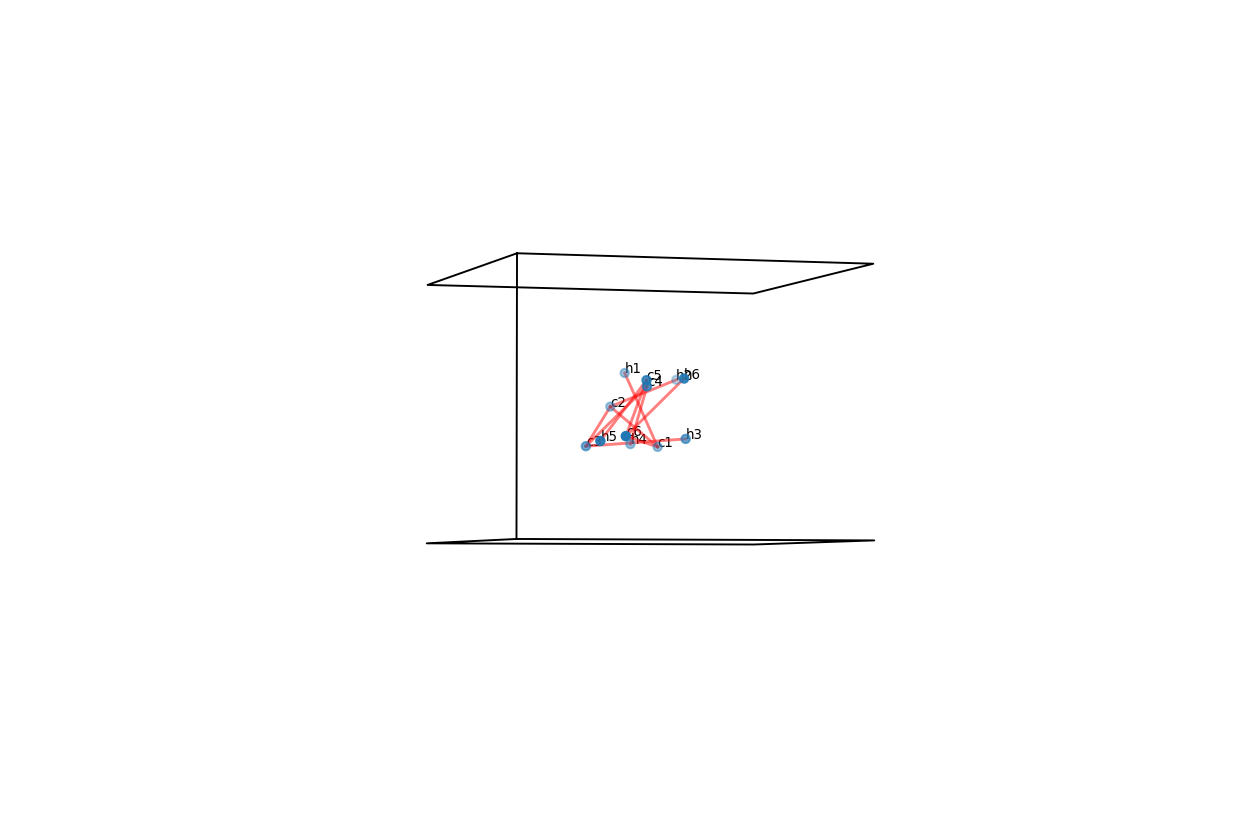

In [6]:
# Chargement du graphe à partir d'un fichier
G_tmp = nx.Graph(read_dot('benzène.dot'))

# Création du graphe
G = nx.Graph()

# Ajouter des noeuds avec des coordonnées aléatoires
for node in G_tmp.nodes():
    x = random.random()
    y = random.random()
    z = random.random()
    G.add_node(node, pos=(x, y, z))

# Ajouter les arrêts entre les noeuds
G.add_edges_from(G_tmp.edges())
pos = nx.get_node_attributes(G, 'pos')

# Chercher le min et le max pour chaque axes pour créer la boite 3D 
minX, minY, minZ = (next(iter(pos.items()))[1][0], next(iter(pos.items()))[1][1], next(iter(pos.items()))[1][2] )
maxX, maxY, maxZ = (0, 0, 0)
for key, value in pos.items():
    if value[0] < minX: minX = value[0]
    if value[0] > maxX: maxX = value[0] 
    if value[1] < minY: minY = value[1]
    if value[1] > maxY: maxY = value[1]
    if value[2] < minZ: minZ = value[2]
    if value[2] > maxZ: maxZ = value[2]
        

# Définition des bords de l'octree 
x_min, y_min, z_min = (minX-1, minY-1, minZ-1)
x_max, y_max, z_max = (maxX+1, maxY+1, maxZ+1)
boundary = Box((x_min, y_min, z_min), (x_max, y_max, z_max))

# Initialize the octree with a maximum depth of 6 and a maximum of 2 points per node
octree = Octree(boundary, max_points=len(pos), max_depth=5)

# Insertion des points dans l'octree
for point in pos.values():
    octree.insert(point)
    
# Dessiner l'octree avec Matplotlib
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Dessiner les arcs entre les points
for edge in G.edges():
    x1, y1, z1 = pos[edge[0]]
    x2, y2, z2 = pos[edge[1]]
    ax.plot([x1, x2], [y1, y2], [z1, z2], color ='red',alpha=0.5)

# Mettre les noms sur les points
for node in G.nodes():
    x, y, z = pos[node]
    ax.text(x, y, z, node,size=7, zorder=1, color='k')

# Afficher le dessin
octree.draw(ax)
ax.mouse_init()

# Suppression du grid
ax.grid(False)

# Suppression des axes 
ax.set_axis_off()

plt.show()

## Créer une fonction qui calcule la complexité

In [7]:
import time
def calculate_complexity(func, graph, nbr_iterations):
    start_time = time.time()
    func(graph, nbr_iterations)
    end_time = time.time()
    return end_time - start_time

## Mise en place de Force Atlas 2

La fonction force_attraction3D prend en entrée un graphe G et un noeud de ce graphe node. Elle calcule la force d'attraction qui s'exerce sur le noeud donné en parcourant toutes les arêtes du graphe et en utilisant les coordonnées des noeuds connectés à ces arêtes pour calculer la distance euclidienne entre eux. La force d'attraction est calculée en utilisant la formule: force = force + (k * distance), où k est une constante qui peut être ajustée pour moduler l'intensité de la force d'attraction. La fonction renvoie la force totale d'attraction calculée.

In [8]:
def force_attraction3D(G, node):
    force = 0
    k = 1
    for u, v in G.edges():
        if u==node or v==node:
            # Obtenir les coordonnées des noeuds
            x1, y1, z1 = G.nodes[u]['pos'][0], G.nodes[u]['pos'][1], G.nodes[u]['pos'][2]
            x2, y2, z2 = G.nodes[v]['pos'][0], G.nodes[v]['pos'][1], G.nodes[v]['pos'][2]
            # Calculer la distance euclidienne entre les noeuds
            distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
            # Calculer la force d'attraction
            force = force + (k * distance)
    return force

Le code ci-dessous définit une fonction qui calcule la force de répulsion entre les nœuds d’un graphique 3D. La fonction prend deux arguments :<br>
<u>G:</u> Le graphique sur lequel se basent les calculs<br>
<u>node:</u> Le nœud pour lequel la force de répulsion est calculée<br>

La fonction commence par initialiser une variable à 0, qui stockera la force de répulsion totale pour le nœud donné. Ensuite, il attribue une valeur à la variable , qui est une constante qui peut être ajustée pour contrôler la force de la force de répulsion.forcek

La fonction itére ensuite sur tous les nœuds du graphique, en comparant chaque nœud au nœud (et sont différents). Il calcule la masse des nœuds en utilisant le degré du nœud en utilisant la formule mass(i) = degree(i). Ensuite, il obtient les coordonnées des nœuds et . Après cela, il calcule la distance euclidienne entre les nœuds et la force de répulsion en utilisant la formule force = force + (k * (m1 + m2) / distance^2) et la force est accumulée pour chaque nœud.

Enfin, la fonction renvoie la force de répulsion totale pour le nœud donné. Cette valeur peut être utilisée pour positionner les nœuds dans l’algorithme de disposition du graphique.


**La masse de degré : Cette formule calcule la masse d'un nœud en comptant 
                    le nombre de liens (ou arcs) qui y arrivent ou en partent. Elle est souvent 
                    utilisée pour les graphes non orientés : masse(i) = degree(i)**

In [9]:
def force_repulsion3D(G, node):
    force = 0
    k = 1
    for i in G.nodes():
        if i == node:
            for j in G.nodes():
                if i != j:
                    # Masse des noeuds (masse de degré)
                    
                    m1 = nx.degree(G)[i]
                    m2 = nx.degree(G)[j]
                    # Obtenir les coordonnées des noeuds
                    x1, y1, z1 = G.nodes[i]['pos'][0], G.nodes[i]['pos'][1], G.nodes[i]['pos'][2]
                    x2, y2, z2 = G.nodes[j]['pos'][0], G.nodes[j]['pos'][1], G.nodes[j]['pos'][2]
                    # Calculer la distance euclidienne entre les noeuds
                    distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
                    # Calculer la force répulsive
                    force = force + (k * (m1+m2) / distance**2)
    return force

La fonction somme_forces3D calcule la somme de la force d’attraction et de la force de répulsion pour un nœud spécifique dans un graphe 3D. Les résultats de ces fonctions peuvent être utilisées pour déplacer les nœuds dans un graphe pour améliorer sa présentation visuelle.

In [10]:
def somme_forces3D(G, node):
    fatt = force_attraction3D(G, node)
    frep = force_repulsion3D(G, node)
    return fatt + frep

Ce code définit une fonction appelée « acceleration_node3D » qui prend en compte deux arguments: un graphe « G » et un nœud dans le graphe « node ». La fonction utilise la fonction « somme_forces3D » précédemment définie pour calculer la somme des forces agissant sur le nœud donné et renvoie l’accélération du nœud, qui est égale à la somme des forces agissant sur le nœud. En d’autres termes, la fonction calcule l’accélération d’un nœud dans l’espace 3D en fonction des forces agissant sur lui, qui sont déterminées par les positions des autres nœuds dans le graphique.

In [11]:
def acceleration_node3D(G, node):
    return somme_forces3D(G, node)

Ce code définit une fonction vitesse_node3D qui calcule la vitesse d’un nœud donné dans un graphique 3D, à l’aide de la formule suivante :

vélocité = vitesse initiale + temps * accélération

La fonction prend en compte deux paramètres, G et nodeoù G est le graphique et node est le nœud dont la vitesse doit être calculée. La vitesse initiale est définie sur 0 et l’heure est définie sur 0,005. L’accélération est calculée en appelant la fonction 'acceleration_node3Dacceleration_node3D, qui à son tour appelle la fonction 'somme_forces3Dsomme_forces3D, qui calcule la somme des forces d’attraction et de répulsion agissant sur le nœud. La vitesse est ensuite calculée en ajoutant le produit du temps et de l’accélération à la vitesse initiale.

In [12]:
def vitesse_node3D(G, node):
    vitesseInitiale = 0
    temps = 0.005
    return vitesseInitiale + temps * acceleration_node3D(G, node)

Ce code définit la fonction forceAtlas3D() qui prend en charge un objet Graph G et un entier nbr_iterations comme entrée. Il applique l’algorithme ForceAtlas3D sur le graphique, qui est un algorithme de mise en page dirigé par force utilisé pour mettre en page des graphiques dans l’espace 3D. L’algorithme est itératif et le nombre d’itérations est spécifié par l’entrée nbr_iterations.

L’algorithme commence par initialiser le pas de temps, temps à une petite valeur (0,005 dans ce cas). Ensuite, pour un nombre spécifié d’itérations, la fonction itére sur tous les nœuds du graphique, G. Pour chaque nœud, il obtient la position actuelle du nœud dans l’espace 3D et calcule la nouvelle position du nœud en fonction de la force nette agissant sur celui-ci. La force nette agissant sur un nœud est la somme des forces d’attraction et de répulsion agissant sur le nœud. La fonction vitesse_node3D() est appelé pour calculer la vitesse du nœud, qui à son tour appelle les autres fonctions acceleration_node3D(), somme_forces3D(), force_repulsion3D()et force_attraction3D() pour calculer respectivement l’accélération, la force nette, la force de répulsion et la force d’attraction.

La nouvelle position du nœud est ensuite mise à jour en ajoutant le pas de temps multiplié par la vitesse du nœud. Enfin, la position du nœud est mise à jour dans le graphique G à l’aide de l' nx.set_node_attributes() fonction. Ce processus est répété pour tous les nœuds du graphique pour le nombre spécifié d’itérations. Le résultat final est une disposition graphique qui tente de minimiser la force nette agissant sur chaque nœud, donnant une mise en page visuellement agréable et facile à comprendre.

In [13]:
def forceAtlas3D(G, nbr_iterations):
    temps = 0.005
    for i in range(nbr_iterations):
        for n in G.nodes():
            old_x, old_y, old_z = G.nodes[n]['pos'][0], G.nodes[n]['pos'][1], G.nodes[n]['pos'][2]
            # Appel à la fonction vitesse_node() qui se charge d'appeler les autres fonctions qui calculent les forces
            new_x = old_x + temps * vitesse_node3D(G, n)
            new_y = old_y + temps * vitesse_node3D(G, n)
            new_z = old_z + temps * vitesse_node3D(G, n)
            # Mise à jours des coordonnées x et y
            nx.set_node_attributes(G, {n: (new_x, new_y, new_z)}, 'pos')

Ce code applique l’algorithme de mise en page ForceAtlas3D au graphe G, avec 1000 itérations. Il met ensuite à jour les positions des nœuds dans le graphique et les réinsère dans l’Octree. Les nouvelles positions des nœuds sont ensuite tracées sur un nuage de points 3D à l’aide de Matplotlib, ainsi que les bords du graphe et les noms des nœuds. L’Octree est également dessiné sur la même parcelle. Enfin, la grille et les axes sont supprimés du tracé et ils sont affichés.

In [14]:
# Application du Force Atlas 2 en calculant le temps d'execution (en seconde)
calculate_complexity(forceAtlas3D, G, 1000)

4.1244590282440186

<IPython.core.display.Javascript object>


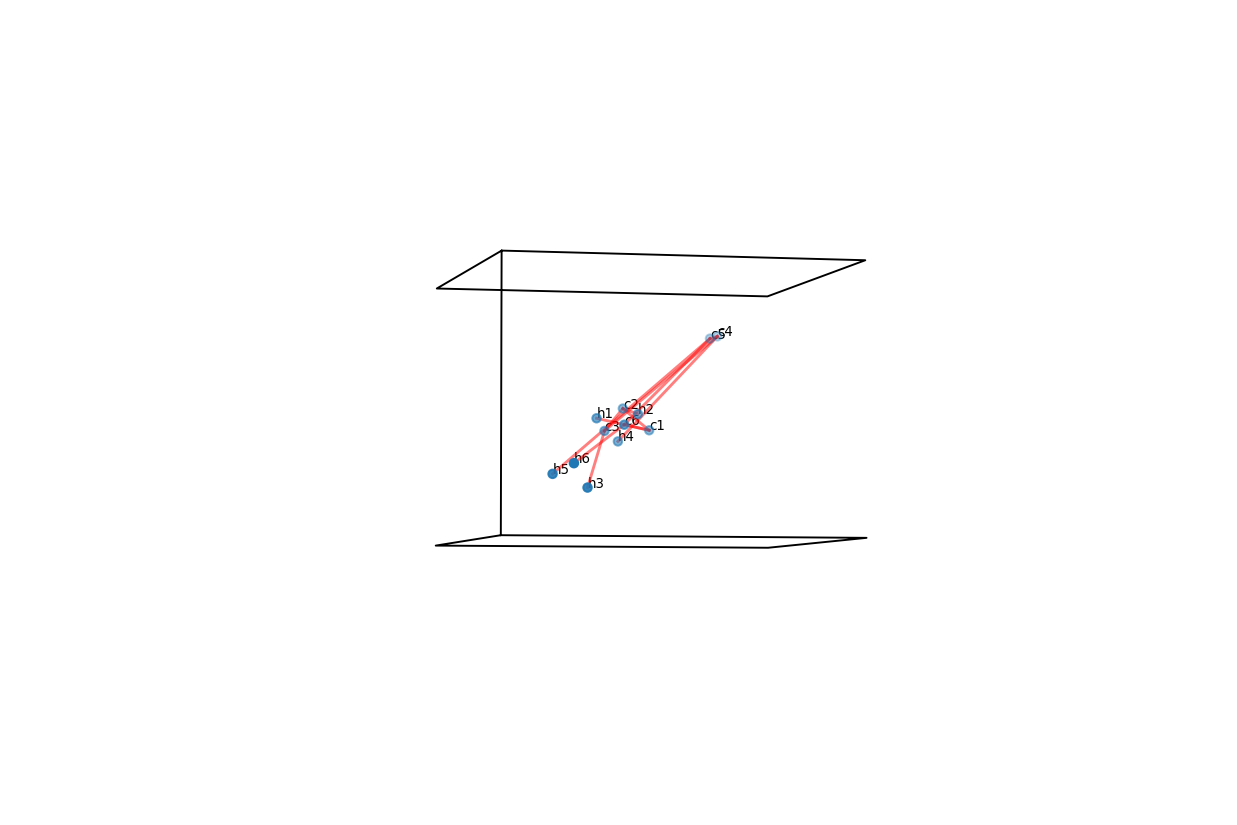

In [15]:
# Chargement des position aprés l'application du ForceAtlas2
pos = nx.get_node_attributes(G, 'pos')

# Chercher sur les bords du l'OctoTree
minX, minY, minZ = (next(iter(pos.items()))[1][0], next(iter(pos.items()))[1][1], next(iter(pos.items()))[1][2])
maxX, maxY, maxZ = (0, 0, 0)
for key, value in pos.items():
    if value[0] < minX: minX = value[0]
    if value[0] > maxX: maxX = value[0]
    if value[1] < minY: minY = value[1]
    if value[1] > maxY: maxY = value[1]
    if value[2] < minZ: minZ = value[2]
    if value[2] > maxZ: maxZ = value[2]
        

# Définition des bords de l'OctoTree
x_min, y_min, z_min = (minX-1, minY-1, minZ-1)
x_max, y_max, z_max = (maxX+1, maxY+1, maxZ+1)
boundary = Box((x_min, y_min, z_min), (x_max, y_max, z_max))

# Initialisation de l'OctoTree
octree1 = Octree(boundary, max_points=len(pos), max_depth=6)

# Insertion des nouvelles positions des points dans l'OctoTree
for point in pos.values():
    octree1.insert(point)


# Dessiner l'OctoTree avec Matplotlib
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# Dessiner les arcs entre les points
for edge in G.edges():
    x1, y1, z1 = pos[edge[0]]
    x2, y2, z2 = pos[edge[1]]
    ax.plot([x1, x2], [y1, y2], [z1, z2], color ='red',alpha=0.5)
    
# Mettre les noms sur lespoints dans le graphiques
for node in G.nodes():
    x, y, z = pos[node]
    ax.text(x, y, z, node,size=7, zorder=1, color='k')

# Afficher le graphique
octree1.draw(ax)
ax.mouse_init()

# Suppression du grid
ax.grid(False)

# Suppression des axes
ax.set_axis_off()
plt.show()

### Calcule de la gravité

Ce code définit une fonction « calcule_gravite » qui prend un graphique (G) et un certain nombre d’itérations (nbr_iterations) comme entrées. La fonction initialise d’abord les variables pour le pas de temps, la vitesse initiale, la force d’attraction, la force de répulsion, la force totale et la valeur de la constante k. Ensuite, il exécute une boucle imbriquée qui itére sur tous les nœuds du graphique pour un certain nombre d’itérations spécifiées par le paramètre d’entrée « nbr_iterations ».

In [16]:
def calcule_gravite(G, nbr_iterations):
    temps = 0.005
    vitesseInitiale = 0
    att_force = rep_force = sum_force = 0

    # Donner une valeur à la constante k
    k = 1
    # Itérer sur toutes les arêtes du graph
    u = 'h1'
    for i in range(nbr_iterations):
        for v in G.nodes():
            if u!=v:
           
                # Masse des noeuds (masse de degré)
                m1 = nx.degree(G)[u]
                m2 = nx.degree(G)[v]

                # Obtenir les coordonnées des noeuds
                x1, y1, z1 = G.nodes[u]['pos'][0], G.nodes[u]['pos'][1], G.nodes[u]['pos'][2]
                x2, y2, z2 = G.nodes[v]['pos'][0], G.nodes[v]['pos'][1], G.nodes[v]['pos'][2]
                
                # Calculer la distance euclidienne entre les noeuds
                distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
                
                # Calculer la force d'attraction
                att_force = k * distance

                # Calculer la force répulsive
                rep_force = k * (m1+m2) / distance**2

                # somme des forces
                sum_force = att_force + rep_force
                
                # Calcule de la vitesse
                vitesse = vitesseInitiale + temps * sum_force
                
                # Mise à jours des position
                new_x = x2 + temps * vitesse
                new_y = y2 + temps * vitesse
                new_z = z2 + temps * vitesse
                
                # Mise à jours des coordonnées x et y
                nx.set_node_attributes(G, {v: (new_x, new_y, new_z)}, 'pos')

In [17]:
# Application du foce de gravité en calculant le temps d'execution (en seconde)
calculate_complexity(calcule_gravite, G, 1000)

0.11120915412902832